### load libraries

In [13]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt

### import the data we gathered from MSD Taste Profiles and Spotify Web API

In [2]:
msd_spot_df = pd.read_csv('taste_profiles_spotify.csv', index_col=0, header=0, dtype={'userID': str, 'songID': str, 
    'playcount': int, 'trackID': str, 'artist': str, 'title': str, 'trackID_spot': str, 'artistID_spot': str,
    'artistGenres': str, 'artistPop': int, 'trackPop': int, 'trackAcoustic': float, 'trackDanceable': float,
    'trackDurMS': int, 'trackEnergy': float, 'trackInstrum': float, 'trackKey': int, 'trackLoud': float, 'trackMode': int,
    'trackSpeech': float, 'trackTempo': float, 'trackVal': float, 'albumYear': int})

msd_spot_df

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackDurMS,trackEnergy,trackInstrum,trackKey,trackLoud,trackMode,trackSpeech,trackTempo,trackVal,albumYear
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,156200,0.830,0.011200,9,-3.995,0,0.0283,102.800,0.909,1974
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,360426,0.654,0.874000,4,-12.673,0,0.0349,102.814,0.924,1997
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,196333,0.692,0.000008,1,-6.880,1,0.0266,100.614,0.523,2002
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,164946,0.423,0.001160,7,-9.239,1,0.0302,78.005,0.507,2006
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,311866,0.717,0.000000,10,-7.858,0,0.1530,103.992,0.490,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633750,cf8289419383259189afe6bb50c5115fd84f1064,SOHKQSO12A8AE47C9C,10,TRPLVWY12903CC08D3,Everything But The Girl,Time After Time,5RxNm1sQygVKpY9hEOvid5,13ccXrK7AmXb4TddMkE7jy,"electronica, new wave pop, pop rock, sophisti-...",60,...,269360,0.203,0.000006,0,-13.612,1,0.0323,120.370,0.326,1992
10633751,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOABJBU12A8C13F63F,2,TRUDZCV128F42811F6,Cage The Elephant,Back Against The Wall,0vz64VTiPPBpcmla0QvAI9,26T3LtbuGT1Fu9m0eRq5X3,"modern rock, punk blues, rock",75,...,228320,0.743,0.000000,1,-6.163,1,0.0305,110.334,0.534,2009
10633752,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOEISDE12A8AE4632E,1,TRKIBVN128F42283F4,King Kobra,Only The Strong Will Survive,5sUy4vaMwn4YCMPlr0RW0g,60DhbkIV5C2aLGgtpfUw2C,"glam metal, hard rock, sleaze rock",36,...,240372,0.853,0.000000,4,-4.691,1,0.0328,91.632,0.550,1986
10633753,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOHHKGO12AC3DF57BF,1,TRODVNR12903CE6C50,Close Your Eyes,17:20,0IUhBvxsm2pLz6rzEM3YUn,4EJdKdDfQ0XQ4YBhh12xZe,christian hardcore,34,...,136920,0.899,0.089900,11,-4.449,1,0.1680,186.031,0.775,2010


### turn "playcount" into a binary outcome: preferred vs. not preferred

In [3]:
grouped = msd_spot_df.groupby(["userID"]).mean()

C:\Users\sophi\AppData\Local\Temp\ipykernel_16940\2452084082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = msd_spot_df.groupby(["userID"]).mean()


In [4]:
grouped.reset_index(inplace=True)
grouped

,userID,playcount,artistPop,trackPop,trackAcoustic,trackDanceable,trackDurMS,trackEnergy,trackInstrum,trackKey,trackLoud,trackMode,trackSpeech,trackTempo,trackVal,albumYear
0,00001638d6189236866af9bbf309ae6c2347ffdc,2.500000,63.500000,33.000000,0.547575,0.493000,285256.250000,0.493650,0.001969,3.750000,-10.885750,1.000000,0.067100,125.396250,0.423400,2009.250000
1,0000175652312d12576d9e6b84f600caa24c4715,1.000000,53.000000,29.400000,0.181656,0.596600,286822.800000,0.826600,0.160806,5.000000,-6.492200,0.800000,0.053780,137.183800,0.626400,2001.000000
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.666667,20.333333,11.333333,0.311833,0.485667,239213.000000,0.451000,0.593133,6.333333,-15.645667,0.666667,0.047600,94.348333,0.107467,2005.333333
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,1.500000,77.500000,40.666667,0.096694,0.412917,244395.083333,0.814417,0.038729,5.250000,-5.675000,0.750000,0.068517,125.641083,0.382417,2007.416667
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,2.000000,32.750000,19.000000,0.021932,0.507750,254516.250000,0.882000,0.232408,5.500000,-6.747250,1.000000,0.052375,136.035500,0.540500,1996.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882475,ffffdc274ca76d154b4e56b2dbc82ff538c93c0b,1.333333,59.666667,38.000000,0.195620,0.590000,217506.500000,0.697333,0.057100,4.333333,-7.302000,0.666667,0.046533,122.707167,0.588833,1992.666667
882476,ffffdc6c89988cd6119067769162948eacf8b670,4.714286,68.285714,47.000000,0.097924,0.533571,257490.857143,0.788714,0.010818,4.142857,-5.777571,0.571429,0.044557,115.878143,0.328429,2008.142857
882477,fffff3e690fcda840b716ce7249d8935ff3323fc,2.250000,59.500000,32.250000,0.272729,0.584250,279796.250000,0.470250,0.000118,5.750000,-11.258500,0.500000,0.093175,133.227750,0.545850,1992.750000
882478,fffff67d54a40927c93d03bd6c816b034b59f087,1.550000,60.350000,22.350000,0.466541,0.460700,250300.550000,0.509470,0.195093,5.750000,-12.852800,0.750000,0.071025,128.900400,0.495750,1992.750000


In [5]:
grouped.drop(columns=['artistPop', 'trackPop', 'trackDurMS', 'trackKey', 'trackLoud', 'trackMode', 'trackTempo'], inplace=True)
grouped.rename(columns={"playcount": "mean_playcount", "trackAcoustic": "c_acoust", "trackDanceable": "c_dance", "trackEnergy": "c_energy", "trackInstrum": "c_inst", "trackSpeech": "c_speech", "trackVal": "c_val", "albumYear": "mean_albumYear"}, inplace=True)

grouped.head()

,userID,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear
0,00001638d6189236866af9bbf309ae6c2347ffdc,2.500000,0.547575,0.493000,0.493650,0.001969,0.067100,0.423400,2009.250000
1,0000175652312d12576d9e6b84f600caa24c4715,1.000000,0.181656,0.596600,0.826600,0.160806,0.053780,0.626400,2001.000000
2,00003a4459f33b92906be11abe0e93efc423c0ff,1.666667,0.311833,0.485667,0.451000,0.593133,0.047600,0.107467,2005.333333
3,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,1.500000,0.096694,0.412917,0.814417,0.038729,0.068517,0.382417,2007.416667
4,000060ca4e6bea0a5c9037fc1bbd7bbabb98c754,2.000000,0.021932,0.507750,0.882000,0.232408,0.052375,0.540500,1996.250000


In [6]:
merged = msd_spot_df.merge(grouped, how='left', on='userID')
merged.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,trackVal,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,0.909,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,0.924,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,0.523,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,0.507,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,0.490,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474


In [7]:
print(len(msd_spot_df))
print(len(merged))

10633755
10633755


In [8]:
merged["Preferred"] = "" #will either be a 1 for YES or 0 for NO

#if user playcount for a song is over their mean, then label it preferred. Else not preferred.
merged['Preferred'] = np.where(merged.playcount >= merged.mean_playcount, '1', '0')
merged.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear,Preferred
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,TRIRLYL128F42539D1,Billy Preston,Nothing from Nothing,72PoJMDfdaw9gGECgA9kTZ,0IecGJbdBeYSOVtSPRehh5,"classic soul, funk, psychedelic soul, quiet st...",53,...,1974,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,TRMHBXZ128F4238406,Paco De Lucia,Entre Dos Aguas,5hVqZ5hnvQGT4LOpUVuJUa,3h8OjAdgYXVRoMZ8jFd6Uw,"flamenco, flamenco guitar, rumba",55,...,1997,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,TRYQMNI128F147C1C7,Josh Rouse,Under Cold Blue Stars,4HWqzvmeiaddzCDkSQcNxf,38euc5ce2q2MMzaoJcPstz,alternative country,44,...,2002,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474,0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,5GCB9mqJzKN4kDKvmqQ03X,4ssUf5gLb1GBLxi1BhPrVt,"cantautor, latin afrobeat, latin alternative, ...",68,...,2006,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,0j2T0R9dR9qdJYsB7ciXhf,5K4W6rqBFWDnAN6FQUkS6x,"chicago rap, rap",92,...,2007,1.315789,0.401536,0.608421,0.635579,0.145652,0.050268,0.629632,1999.789474,0


### what is the ratio of preferred to not preferred in the dataset?

We want the distribution of classes to be even.

In [9]:
print("Number of preferred observations: ", len(merged[merged["Preferred"]=='1']))
print("Number of not preferred observations: ", len(merged[merged["Preferred"]=='0']))

Number of preferred observations:  3380908
Number of not preferred observations:  7252847


Since there's about half as many preferred vs not preferred samples in our dataset, we will resample so that it's even.

### resampling

In [10]:
sampled = merged[merged["Preferred"]=='0'].sample(n=len(merged[merged["Preferred"]=='1']), random_state=42)

indices1 = list(sampled.index)
indices2 = list(merged[merged["Preferred"]=='1'].index)
indices1.extend(indices2)

nb_df = merged.iloc[indices1,:]
nb_df.reset_index(inplace=True, drop=True)
nb_df.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,albumYear,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear,Preferred
0,f585053b5c30ee74d4f153575c1c76c91f82a0f3,SODGVGW12AC9075A8D,1,TRRHGFY12903CD2DC8,Justin Bieber,Somebody To Love,3rLIv187BhjyweFe89SgLn,1uNFoZAHBGtllmzznpCI3s,"canadian pop, pop",92,...,2010,1.592593,0.190728,0.566926,0.707444,0.120720,0.046152,0.525630,2000.444444,0
1,735038262f98719e6e093bfd5f13cdf24f98acde,SOBIODV12A58A76A99,1,TRWBFJR128F42333EB,PJ Harvey,White Chalk,6T74sWvcHvSAO5prlk5dDw,12VaqyEhgwDRuFfEqbnrpz,"alternative rock, art pop, art rock, chamber p...",60,...,2007,1.142857,0.272327,0.559714,0.616214,0.200404,0.068086,0.464964,1999.500000,0
2,41ce281156a3d47d39212a1609dfd4f9b61e5f5e,SOBNVBN12A58A792BB,1,TRNLLRY128F932D080,Nicholas Hooper,"School! (""Harry Potter & The Half-Blood Prince"")",5atWvqfHJh8KHXCF4GH7pQ,6S9bLkEZSVIcY18RNcNG50,"british soundtrack, soundtrack",57,...,2009,1.736842,0.337570,0.501816,0.475042,0.335907,0.045700,0.291537,2003.368421,0
3,b0a1e124b76f1c2a5ffd0c582d680c4a0e73a827,SOEHDTU12AF72A8BD5,1,TRXNEWL12903CE9600,Aloe Blacc,I Need A Dollar,3oUphdZVPyrsprZ8FgbmQS,0id62QV2SZZfvBn9xpmuCl,"neo soul, pop soul, r&b",68,...,2010,2.714286,0.255153,0.622119,0.683429,0.410723,0.077736,0.512717,2005.595238,0
4,d9898b891bded9461d83d2dec3bbb736d8080f9e,SOFQKZV12AB018514A,1,TRAIRMN12903CBE0B0,Laura Marling,I Speak Because I Can,2CTOa3CEBts3p1NyTVLTXU,7B2edU3Q7btJoNsoHCNohM,"art pop, british folk, british singer-songwrit...",57,...,2010,2.000000,0.331807,0.614000,0.600113,0.120815,0.069993,0.572133,2000.400000,0


In [12]:
print("Number of preferred observations: ", len(nb_df[nb_df["Preferred"]=='1']))
print("Number of not preferred observations: ", len(nb_df[nb_df["Preferred"]=='0']))

Number of preferred observations:  3380908
Number of not preferred observations:  3380908


### create a quantitative preference distance metric for each song and user

This will be based off of the following attributes from our dataset:
- trackAcoustic
- trackDanceable
- trackEnergy
- trackInstrum
- trackSpeech
- trackVal

In [14]:
nb_df["pref_dist"] = 0

counter = 0
for i,row in nb_df.iterrows():
    #for each song for that user, calculate how close the song is to that 6 dimensional centroid/average value
    #since we have a lot of dimensions, lets use cosine similarity
    centr = np.array([row["c_acoust"], row["c_dance"], row["c_energy"], row["c_inst"], row["c_speech"], row["c_val"]])
    track = np.array([row["trackAcoustic"], row["trackDanceable"], row["trackEnergy"], row["trackInstrum"], row["trackSpeech"], row["trackVal"]])
    
    # compute cosine similarity
    cosine = np.dot(centr,track)/(norm(centr)*norm(track))
    nb_df.loc[i,"pref_dist"] = cosine
    
    counter += 1
    if counter%10000==0: print(counter)

C:\Users\sophi\AppData\Local\Temp\ipykernel_16940\1616558070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_df["pref_dist"] = 0


10000
20000
30000
40000
50000


C:\Users\sophi\AppData\Local\Temp\ipykernel_16940\1616558070.py:11: RuntimeWarning: invalid value encountered in double_scalars
  cosine = np.dot(centr,track)/(norm(centr)*norm(track))


60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
14

In [15]:
nb_df.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,mean_playcount,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear,Preferred,pref_dist
0,f585053b5c30ee74d4f153575c1c76c91f82a0f3,SODGVGW12AC9075A8D,1,TRRHGFY12903CD2DC8,Justin Bieber,Somebody To Love,3rLIv187BhjyweFe89SgLn,1uNFoZAHBGtllmzznpCI3s,"canadian pop, pop",92,...,1.592593,0.190728,0.566926,0.707444,0.120720,0.046152,0.525630,2000.444444,0,0.977132
1,735038262f98719e6e093bfd5f13cdf24f98acde,SOBIODV12A58A76A99,1,TRWBFJR128F42333EB,PJ Harvey,White Chalk,6T74sWvcHvSAO5prlk5dDw,12VaqyEhgwDRuFfEqbnrpz,"alternative rock, art pop, art rock, chamber p...",60,...,1.142857,0.272327,0.559714,0.616214,0.200404,0.068086,0.464964,1999.500000,0,0.763344
2,41ce281156a3d47d39212a1609dfd4f9b61e5f5e,SOBNVBN12A58A792BB,1,TRNLLRY128F932D080,Nicholas Hooper,"School! (""Harry Potter & The Half-Blood Prince"")",5atWvqfHJh8KHXCF4GH7pQ,6S9bLkEZSVIcY18RNcNG50,"british soundtrack, soundtrack",57,...,1.736842,0.337570,0.501816,0.475042,0.335907,0.045700,0.291537,2003.368421,0,0.752265
3,b0a1e124b76f1c2a5ffd0c582d680c4a0e73a827,SOEHDTU12AF72A8BD5,1,TRXNEWL12903CE9600,Aloe Blacc,I Need A Dollar,3oUphdZVPyrsprZ8FgbmQS,0id62QV2SZZfvBn9xpmuCl,"neo soul, pop soul, r&b",68,...,2.714286,0.255153,0.622119,0.683429,0.410723,0.077736,0.512717,2005.595238,0,0.870781
4,d9898b891bded9461d83d2dec3bbb736d8080f9e,SOFQKZV12AB018514A,1,TRAIRMN12903CBE0B0,Laura Marling,I Speak Because I Can,2CTOa3CEBts3p1NyTVLTXU,7B2edU3Q7btJoNsoHCNohM,"art pop, british folk, british singer-songwrit...",57,...,2.000000,0.331807,0.614000,0.600113,0.120815,0.069993,0.572133,2000.400000,0,0.705064


### use each user's mean year of release to normalize that attribute

year_sim = |albumYear - mean_albumYear|

In [17]:
nb_df["year_sim"] = abs(nb_df["albumYear"] - nb_df["mean_albumYear"])
nb_df.head()

C:\Users\sophi\AppData\Local\Temp\ipykernel_16940\2456220502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_df["year_sim"] = abs(nb_df["albumYear"] - nb_df["mean_albumYear"])


,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear,Preferred,pref_dist,year_sim
0,f585053b5c30ee74d4f153575c1c76c91f82a0f3,SODGVGW12AC9075A8D,1,TRRHGFY12903CD2DC8,Justin Bieber,Somebody To Love,3rLIv187BhjyweFe89SgLn,1uNFoZAHBGtllmzznpCI3s,"canadian pop, pop",92,...,0.190728,0.566926,0.707444,0.120720,0.046152,0.525630,2000.444444,0,0.977132,9.555556
1,735038262f98719e6e093bfd5f13cdf24f98acde,SOBIODV12A58A76A99,1,TRWBFJR128F42333EB,PJ Harvey,White Chalk,6T74sWvcHvSAO5prlk5dDw,12VaqyEhgwDRuFfEqbnrpz,"alternative rock, art pop, art rock, chamber p...",60,...,0.272327,0.559714,0.616214,0.200404,0.068086,0.464964,1999.500000,0,0.763344,7.500000
2,41ce281156a3d47d39212a1609dfd4f9b61e5f5e,SOBNVBN12A58A792BB,1,TRNLLRY128F932D080,Nicholas Hooper,"School! (""Harry Potter & The Half-Blood Prince"")",5atWvqfHJh8KHXCF4GH7pQ,6S9bLkEZSVIcY18RNcNG50,"british soundtrack, soundtrack",57,...,0.337570,0.501816,0.475042,0.335907,0.045700,0.291537,2003.368421,0,0.752265,5.631579
3,b0a1e124b76f1c2a5ffd0c582d680c4a0e73a827,SOEHDTU12AF72A8BD5,1,TRXNEWL12903CE9600,Aloe Blacc,I Need A Dollar,3oUphdZVPyrsprZ8FgbmQS,0id62QV2SZZfvBn9xpmuCl,"neo soul, pop soul, r&b",68,...,0.255153,0.622119,0.683429,0.410723,0.077736,0.512717,2005.595238,0,0.870781,4.404762
4,d9898b891bded9461d83d2dec3bbb736d8080f9e,SOFQKZV12AB018514A,1,TRAIRMN12903CBE0B0,Laura Marling,I Speak Because I Can,2CTOa3CEBts3p1NyTVLTXU,7B2edU3Q7btJoNsoHCNohM,"art pop, british folk, british singer-songwrit...",57,...,0.331807,0.614000,0.600113,0.120815,0.069993,0.572133,2000.400000,0,0.705064,9.600000


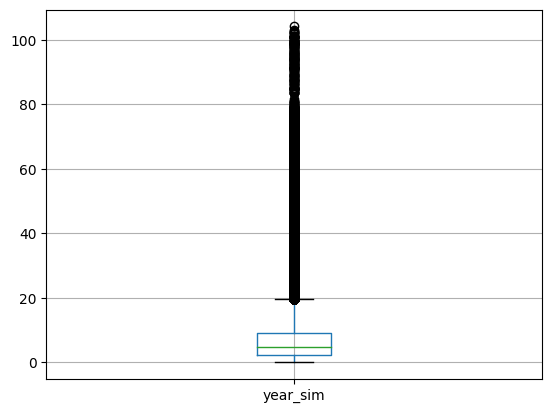

In [28]:
axs = nb_df[['year_sim']].boxplot(return_type='axes')
plt.show()

In [29]:
#calculate interquartile range
q1 = nb_df["year_sim"].quantile(0.25)
q3 = nb_df["year_sim"].quantile(0.75)

print("year sim: ", (~nb_df["year_sim"].between(q1-1.5*(q3-q1), q3+1.5*(q3-q1))).values.sum(), "outliers")

year sim:  440201 outliers


In [30]:
# remove outliers for simplicity
nb_df = nb_df.loc[(nb_df['year_sim'].between(q1-1.5*(q3-q1), q3+1.5*(q3-q1))),:]
nb_df.reset_index(inplace=True, drop=True)
nb_df.head()

,userID,songID,playcount,trackID,artist,title,trackID_spot,artistID_spot,artistGenres,artistPop,...,c_acoust,c_dance,c_energy,c_inst,c_speech,c_val,mean_albumYear,Preferred,pref_dist,year_sim
0,f585053b5c30ee74d4f153575c1c76c91f82a0f3,SODGVGW12AC9075A8D,1,TRRHGFY12903CD2DC8,Justin Bieber,Somebody To Love,3rLIv187BhjyweFe89SgLn,1uNFoZAHBGtllmzznpCI3s,"canadian pop, pop",92,...,0.190728,0.566926,0.707444,0.120720,0.046152,0.525630,2000.444444,0,0.977132,9.555556
1,735038262f98719e6e093bfd5f13cdf24f98acde,SOBIODV12A58A76A99,1,TRWBFJR128F42333EB,PJ Harvey,White Chalk,6T74sWvcHvSAO5prlk5dDw,12VaqyEhgwDRuFfEqbnrpz,"alternative rock, art pop, art rock, chamber p...",60,...,0.272327,0.559714,0.616214,0.200404,0.068086,0.464964,1999.500000,0,0.763344,7.500000
2,41ce281156a3d47d39212a1609dfd4f9b61e5f5e,SOBNVBN12A58A792BB,1,TRNLLRY128F932D080,Nicholas Hooper,"School! (""Harry Potter & The Half-Blood Prince"")",5atWvqfHJh8KHXCF4GH7pQ,6S9bLkEZSVIcY18RNcNG50,"british soundtrack, soundtrack",57,...,0.337570,0.501816,0.475042,0.335907,0.045700,0.291537,2003.368421,0,0.752265,5.631579
3,b0a1e124b76f1c2a5ffd0c582d680c4a0e73a827,SOEHDTU12AF72A8BD5,1,TRXNEWL12903CE9600,Aloe Blacc,I Need A Dollar,3oUphdZVPyrsprZ8FgbmQS,0id62QV2SZZfvBn9xpmuCl,"neo soul, pop soul, r&b",68,...,0.255153,0.622119,0.683429,0.410723,0.077736,0.512717,2005.595238,0,0.870781,4.404762
4,d9898b891bded9461d83d2dec3bbb736d8080f9e,SOFQKZV12AB018514A,1,TRAIRMN12903CBE0B0,Laura Marling,I Speak Because I Can,2CTOa3CEBts3p1NyTVLTXU,7B2edU3Q7btJoNsoHCNohM,"art pop, british folk, british singer-songwrit...",57,...,0.331807,0.614000,0.600113,0.120815,0.069993,0.572133,2000.400000,0,0.705064,9.600000


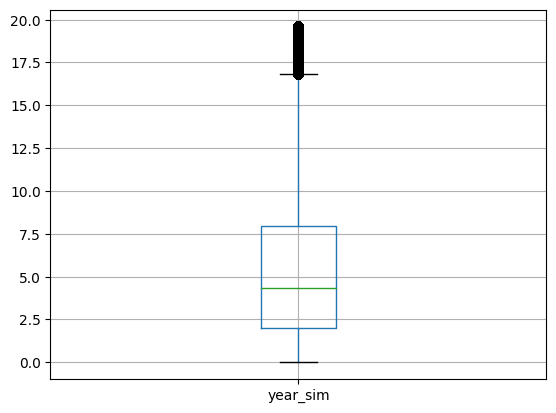

In [31]:
axs = nb_df[['year_sim']].boxplot(return_type='axes')
plt.show()

In [32]:
print("Number of preferred observations: ", len(nb_df[nb_df["Preferred"]=='1']))
print("Number of not preferred observations: ", len(nb_df[nb_df["Preferred"]=='0']))

Number of preferred observations:  3165330
Number of not preferred observations:  3156285


### clean up the dataframe

In [40]:
nb_df_clean = pd.DataFrame(nb_df, columns=["artistPop", "trackPop", "trackKey", "trackMode", "year_sim", "pref_dist", "Preferred"])
nb_df_clean.head()

,artistPop,trackPop,trackKey,trackMode,year_sim,pref_dist,Preferred
0,92,65,5,1,9.555556,0.977132,0
1,60,42,5,0,7.500000,0.763344,0
2,57,37,7,1,5.631579,0.752265,0
3,68,65,6,0,4.404762,0.870781,0
4,57,53,9,0,9.600000,0.705064,0


In [41]:
len(nb_df_clean)

6321615

In [42]:
# check for missing values
nb_df_clean.isnull().sum()

artistPop      0
trackPop       0
trackKey       0
trackMode      0
year_sim       0
pref_dist    362
Preferred      0
dtype: int64

In [43]:
# remove missing values
nb_df_clean.dropna(inplace=True)
nb_df_clean.isnull().sum()

artistPop    0
trackPop     0
trackKey     0
trackMode    0
year_sim     0
pref_dist    0
Preferred    0
dtype: int64

In [44]:
nb_df_clean.reset_index(inplace=True, drop=True)
len(nb_df_clean)

6321253

### discretize numeric variables

Naive Bayes performs best on categorical data, and since we have a lot of numeric data we will discetize it first. Discretization thresholds are informed from the decision tree results and the splitting thresholds returned by the model.

In [45]:
# popularity metrics will be discretized into bins of 10
nb_df_clean["d_artistPop"] = np.floor(nb_df_clean["artistPop"] / 10.)
nb_df_clean["d_trackPop"] = np.floor(nb_df_clean["trackPop"] / 10.)

nb_df_clean.head()

,artistPop,trackPop,trackKey,trackMode,year_sim,pref_dist,Preferred,d_artistPop,d_trackPop
0,92,65,5,1,9.555556,0.977132,0,9.0,6.0
1,60,42,5,0,7.500000,0.763344,0,6.0,4.0
2,57,37,7,1,5.631579,0.752265,0,5.0,3.0
3,68,65,6,0,4.404762,0.870781,0,6.0,6.0
4,57,53,9,0,9.600000,0.705064,0,5.0,5.0


In [56]:
# preference distance is split into three levels, as indicated by DT results
nb_df_clean["d_pref_dist"] = pd.cut(nb_df_clean["pref_dist"],
                               bins=[0, 0.842, 0.998, 1.1], 
                               labels=["3", "2", "1"])

nb_df_clean.head()

,artistPop,trackPop,trackKey,trackMode,year_sim,pref_dist,Preferred,d_artistPop,d_trackPop,d_pref_dist,d_year_sim
0,92,65,5,1,9.555556,0.977132,0,9.0,6.0,2,1.0
1,60,42,5,0,7.500000,0.763344,0,6.0,4.0,3,1.0
2,57,37,7,1,5.631579,0.752265,0,5.0,3.0,3,1.0
3,68,65,6,0,4.404762,0.870781,0,6.0,6.0,2,0.0
4,57,53,9,0,9.600000,0.705064,0,5.0,5.0,3,1.0


In [47]:
# year_sim discretize into bins of 5 years
nb_df_clean["d_year_sim"] = np.floor(nb_df_clean["year_sim"] / 5.)
nb_df_clean.head()

,artistPop,trackPop,trackKey,trackMode,year_sim,pref_dist,Preferred,d_artistPop,d_trackPop,d_pref_dist,d_year_sim
0,92,65,5,1,9.555556,0.977132,0,9.0,6.0,2,1.0
1,60,42,5,0,7.500000,0.763344,0,6.0,4.0,3,1.0
2,57,37,7,1,5.631579,0.752265,0,5.0,3.0,3,1.0
3,68,65,6,0,4.404762,0.870781,0,6.0,6.0,2,0.0
4,57,53,9,0,9.600000,0.705064,0,5.0,5.0,3,1.0


### keep only categorical variables and fix data types

In [61]:
nb_df_disc = pd.DataFrame(nb_df_clean, columns=["d_artistPop", "d_trackPop", "trackKey", "trackMode", "d_year_sim", "d_pref_dist", "Preferred"], dtype='int32')
nb_df_disc.head()

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
0,9,6,5,1,1,2,0
1,6,4,5,0,1,3,0
2,5,3,7,1,1,3,0
3,6,6,6,0,0,2,0
4,5,5,9,0,1,3,0


### create a smaller sample of data for upload

In [69]:
indices = list((nb_df_disc[nb_df_disc["Preferred"]==0].sample(n=482986, random_state=42)).index)
indices.extend(list((nb_df_disc[nb_df_disc["Preferred"]==1].sample(n=482986, random_state=42)).index))

data_sample = nb_df_disc.iloc[indices,:]
data_sample.reset_index(inplace=True, drop=True)
data_sample

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
0,4,2,1,1,0,2,0
1,5,4,2,1,0,2,0
2,4,4,11,1,1,2,0
3,6,7,2,1,0,3,0
4,8,5,6,0,1,2,0
...,...,...,...,...,...,...,...
965967,7,7,2,1,2,2,1
965968,0,0,6,1,0,2,1
965969,4,2,9,0,0,2,1
965970,6,3,0,1,0,2,1


In [70]:
print("Number of preferred observations: ", len(data_sample[data_sample["Preferred"]==1]))
print("Number of not preferred observations: ", len(data_sample[data_sample["Preferred"]==0]))

Number of preferred observations:  482986
Number of not preferred observations:  482986


In [71]:
data_sample.to_csv("nb_data_sample.csv")

### create training and testing splits

80 : 20 split

In [72]:
# shuffle the data
shuffled = data_sample.sample(frac=1, random_state=42)
shuffled.head()

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
898663,2,0,2,1,0,3,1
914470,4,5,0,0,2,2,1
71972,7,2,2,1,1,2,0
714474,4,1,1,1,3,2,1
719035,4,1,7,1,0,2,1


In [73]:
# grab the first part of the dataframe as the training
splt_at = round(len(data_sample)*0.8)
training = shuffled.iloc[:splt_at, :]
training.head()

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
898663,2,0,2,1,0,3,1
914470,4,5,0,0,2,2,1
71972,7,2,2,1,1,2,0
714474,4,1,1,1,3,2,1
719035,4,1,7,1,0,2,1


In [74]:
len(training)

772778

In [76]:
print(len(training[training["Preferred"]==0]))
print(len(training[training["Preferred"]==1]))

386474
386304


In [77]:
# grab the second part of the dataframe as the testing
testing = shuffled.iloc[splt_at:, :]
testing.head()

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
417446,4,1,6,1,1,2,0
888269,6,4,7,1,0,2,1
563349,4,0,9,0,0,2,1
136954,7,6,4,0,2,2,0
623669,6,4,0,1,2,2,1


In [78]:
len(testing)

193194

In [80]:
print(len(testing[testing["Preferred"]==0]))
print(len(testing[testing["Preferred"]==1]))

96512
96682


In [81]:
training.to_csv("NB_train.csv")
testing.to_csv("NB_test.csv")